In [1]:
from collections import Counter
import random
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
random.seed(1)
np.random.seed(444)
np.set_printoptions(precision=3)
plt.ioff()

# ---------------------------------------------------------------------
# Histograms in Pure Python
# ---------------------------------------------------------------------


def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    # Bind method to a variable for faster calls within loop.
    get = hist.get
    for i in seq:
        hist[i] = get(i, 0) + 1
    return hist

In [3]:
def ascii_histogram(seq) -> None:
    """A horizontal frequency-table/histogram plot."""
    counted = count_elements(seq)
    for k in sorted(counted):
        print("{0:5d} {1}".format(k, "+" * counted[k]))


In [4]:
a = (0, 1, 1, 1, 2, 3, 7, 7, 23)
counted = count_elements(a)
recounted = Counter(a)
# Both `.items()` are instances of Python builtin `dict_items`.
assert counted.items() == recounted.items(), "Frequency tables unequal."
print("`a`:", a)
print("Manual frequency table of `a`:", counted)
print("With `collections.Counter`:", recounted)
print()


`a`: (0, 1, 1, 1, 2, 3, 7, 7, 23)
Manual frequency table of `a`: {0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}
With `collections.Counter`: Counter({1: 3, 7: 2, 0: 1, 2: 1, 3: 1, 23: 1})



In [5]:
vals = [1, 3, 4, 6, 8, 9, 10]
# Each number in `vals` will occur between 5 and 15 times.
freq = [random.randint(5, 15) for _ in vals]

data = []
for f, v in zip(freq, vals):
    data.extend([v] * f)
print("ASCII histogram of `data`:")
ascii_histogram(data)
print()

ASCII histogram of `data`:
    1 +++++++
    3 ++++++++++++++
    4 ++++++
    6 +++++++++
    8 ++++++
    9 ++++++++++++
   10 ++++++++++++



In [6]:
d = np.random.laplace(loc=15, scale=3, size=500)
hist, bin_edges = np.histogram(d)
print("first 5 elements of `d`:", d[:5])
print("hist:", hist)
print("bin_edges:", bin_edges)

first 5 elements of `d`: [18.406 18.087 16.004 16.221  7.358]
hist: [ 13  23  91 261  80  21   7   2   1   1]
bin_edges: [ 2.11   5.874  9.638 13.402 17.166 20.93  24.694 28.458 32.222 35.986
 39.749]


In [7]:
# ---------------------------------------------------------------------
# Histograms Calculations in NumPy
# ---------------------------------------------------------------------



bcounts = np.bincount(a)
hist, _ = np.histogram(a, range=(0, max(a)), bins=max(a) + 1)
print(bcounts)
assert np.array_equal(hist, bcounts), "Bincounts unequal."

# Reproducing `collections.Counter`
print(
    "Reproducing `collections.Counter`:",
    dict(zip(np.unique(a), bcounts[bcounts.nonzero()])),
)

[1 3 1 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Reproducing `collections.Counter`: {0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}


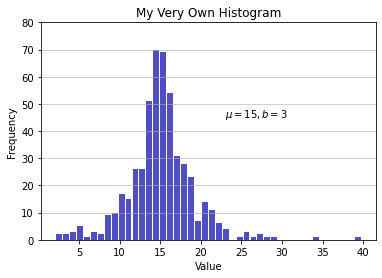

In [8]:

# ---------------------------------------------------------------------
# Visualizing Histograms with Matplotlib & Pandas
# ---------------------------------------------------------------------

n, bins, patches = plt.hist(
    x=d, bins="auto", color="#0504aa", alpha=0.7, rwidth=0.85
)
plt.grid(axis="y", alpha=0.75)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("My Very Own Histogram")
plt.text(23, 45, r"$\mu=15, b=3$")
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

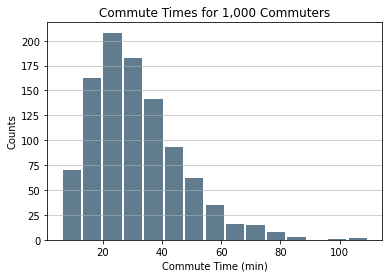

In [9]:
# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(bins=15, rwidth=0.9, color="#607c8e")
plt.title("Commute Times for 1,000 Commuters")
plt.xlabel("Commute Time (min)")
plt.ylabel("Counts")
plt.grid(axis="y", alpha=0.75)
plt.show()

          a      b
min   -3.05  13.27
max   20.23  26.44
mean   9.90  19.94
std    3.83   2.04


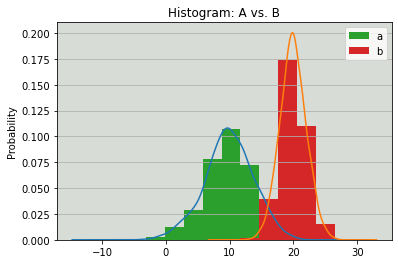

In [10]:
# ---------------------------------------------------------------------
# Plotting a Kernel Density Estimate
# ---------------------------------------------------------------------

# Sample from two different normal distributions.
means = 10, 20
stdevs = 4, 2
dist = pd.DataFrame(
    np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
    columns=["a", "b"],
)
print(dist.agg(["min", "max", "mean", "std"]).round(decimals=2))

fig, ax = plt.subplots()
dist.plot.kde(ax=ax, grid=True, legend=False, title="Histogram: A vs. B")
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel("Probability")
ax.set_facecolor("#d8dcd6")
ax.grid(axis="y")
plt.show()


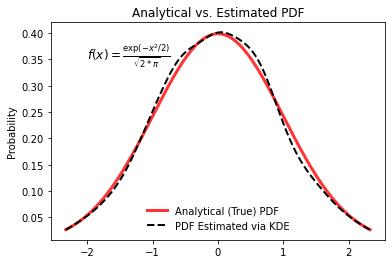

In [11]:
# An object representing the "frozen" analytical distribution.
# Defaults to the standard normal distribution, N~(0, 1)
dist = stats.norm()

# Draw random samples from the population you built above.
# This is just a sample, so the mean and std. deviation should
# be close to (1, 0).
samp = dist.rvs(size=1000)

# `ppf()`: percent point function (inverse of cdf — percentiles).
x = np.linspace(start=stats.norm.ppf(0.01), stop=stats.norm.ppf(0.99), num=250)
gkde = stats.gaussian_kde(dataset=samp)

# `gkde.evaluate()` estimates the PDF itself.
fig, ax = plt.subplots()
ax.plot(
    x,
    dist.pdf(x),
    linestyle="solid",
    c="red",
    lw=3,
    alpha=0.8,
    label="Analytical (True) PDF",
)
ax.plot(
    x,
    gkde.evaluate(x),
    linestyle="dashed",
    c="black",
    lw=2,
    label="PDF Estimated via KDE",
)
ax.legend(loc="best", frameon=False)
ax.set_title("Analytical vs. Estimated PDF")
ax.set_ylabel("Probability")
ax.text(-2.0, 0.35, r"$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$", fontsize=12)
plt.show()

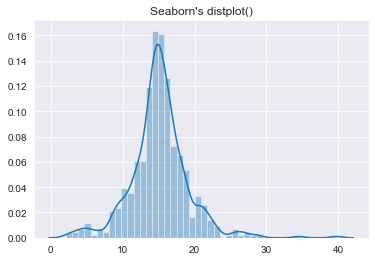

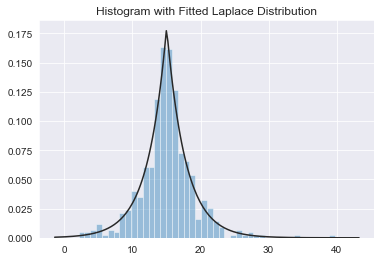

In [12]:
# ---------------------------------------------------------------------
# A Fancy Alternative with Seaborn
# ---------------------------------------------------------------------

sns.set_style("darkgrid")
# Suppress the kwarg warning related to normed/density from Matplotlib.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)

    sns.distplot(d)
    plt.title("Seaborn's distplot()")
    plt.show()

    sns.distplot(d, fit=stats.laplace, kde=False)
    plt.title("Histogram with Fitted Laplace Distribution")
    plt.show()

In [13]:
data = np.random.choice(
    np.arange(10), size=10000, p=np.linspace(1, 11, 10) / 60
)
s = pd.Series(data)
print(s.value_counts())
print(s.value_counts(normalize=True).head())

ages = pd.Series(
    [1, 1, 3, 5, 8, 10, 12, 15, 18, 18, 19, 20, 25, 30, 40, 51, 52]
)
bins = (0, 10, 13, 18, 21, np.inf)  # The edges
labels = ("child", "preteen", "teen", "military_age", "adult")
groups, _ = pd.cut(ages, bins=bins, labels=labels, retbins=True)
print(groups.value_counts())
print(pd.concat((ages, groups), axis=1).rename(columns={0: "age", 1: "group"}))


9    1815
8    1673
7    1445
6    1293
5    1099
4     940
3     694
2     537
1     352
0     152
dtype: int64
9    0.1815
8    0.1673
7    0.1445
6    0.1293
5    0.1099
dtype: float64
child           6
adult           5
teen            3
military_age    2
preteen         1
dtype: int64
    age         group
0     1         child
1     1         child
2     3         child
3     5         child
4     8         child
5    10         child
6    12       preteen
7    15          teen
8    18          teen
9    18          teen
10   19  military_age
11   20  military_age
12   25         adult
13   30         adult
14   40         adult
15   51         adult
16   52         adult
